### 1. 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. 데이터 전처리

In [2]:
titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("titanic_df.shape:", titanic_df.shape)
titanic_df.info()

titanic_df.shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Age, Cabin, Embarked 의 NaN 값을 대체함.
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["Embarked"].fillna("N", inplace=True)
print("null 개수:", titanic_df.isnull().sum().sum())

null 개수: 0


In [8]:
# 현재 남아있는 문자열 피처 - Sex, Cabin, Embarked
print("Sex 값 분포\n", titanic_df["Sex"].value_counts())
print("\nCabin 값 분포:\n", titanic_df["Cabin"].value_counts())
print("\nEmbarked 값 분포:\n", titanic_df["Embarked"].value_counts())

Sex 값 분포
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포:
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
A5               1
C87              1
F38              1
A32              1
A20              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [10]:
# Cabin 의 값이 많이 분포되어 있으니 데이터를 첫 문자열로 바꿈.
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
titanic_df["Cabin"].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### - 성별에 따른 생존율
- groupby 로 예측
- seaborn 으로 시각화하여 예측

In [20]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()
# 아래 결과를 보면 여자가 더 많이 생존한 것을 볼 수 있다.  (0 은 사망, 1 은 생존)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

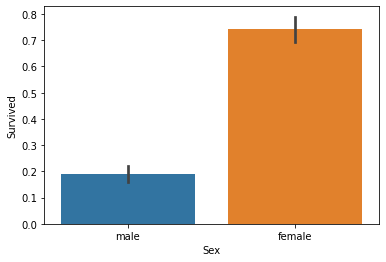

In [15]:
sns.barplot(x="Sex", y="Survived", data=titanic_df)

### - 성별, 등급별 생존율

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

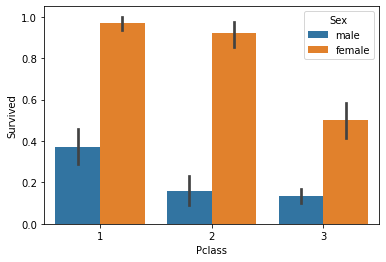

In [17]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

### - 나이별 생존율을 예측하기 위한 데이터 전처리

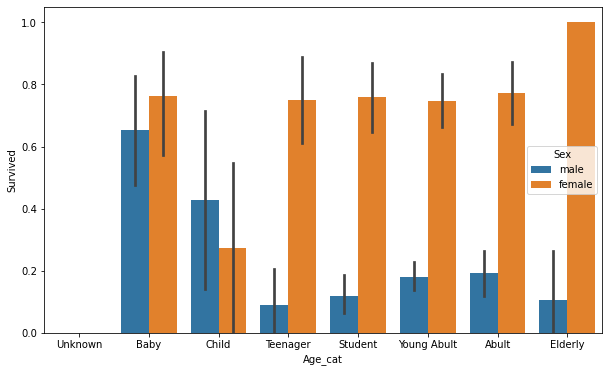

In [19]:
def get_category(age):
    category = ""
    if age <= -1: category = "Unknown"
    elif age <= 5: category = "Baby"
    elif age <= 12: category = "Child"
    elif age <= 18: category = "Teenager"
    elif age <= 25: category = "Student"
    elif age <= 35: category = "Young Abult"
    elif age <= 60: category = "Abult"
    else: category = "Elderly"
    return category

plt.figure(figsize=(10, 6))

group_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Abult", "Abult", "Elderly"]

titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x : get_category(x)) # apply 메소드로 분류해줌.
sns.barplot(x = "Age_cat", y="Survived", hue="Sex", data=titanic_df, order=group_names)  # 데이터 시각화
titanic_df.drop("Age_cat", axis=1, inplace=True)  # Age_cat 컬럼을 삭제함.

### - LabelEncoder 로 문자열을 숫자로 전처리

In [23]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


### 2. 내부 함수 구성

In [47]:
# Null 처리
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    df["Fare"].fillna(0, inplace=True)
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
    return df

# 레이블 인코딩
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 정의한 메소드 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 3. MachineLearning

In [49]:
titanic_df = pd.read_csv("./titanic_train.csv")  # 학습 데이터 재로딩
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=123)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=123)
rf_clf = RandomForestClassifier(random_state=123)
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("dt_pred accuracy score:", np.round(accuracy_score(y_test, dt_pred), 4))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("rf_pred accuracy score:", np.round(accuracy_score(y_test, rf_pred), 4))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("lr_pred accuracy score:", np.round(accuracy_score(y_test, lr_pred), 4))

dt_pred accuracy score: 0.8045
rf_pred accuracy score: 0.838
lr_pred accuracy score: 0.8156


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### - 교차 검증

In [54]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f"{iter_count} accuracy score : {np.round(accuracy, 4)}")
    
print(f"accuray scores mean is {np.round((sum(scores) / len(scores)), 4)}")

0 accuracy score : 0.743
1 accuracy score : 0.7865
2 accuracy score : 0.8034
3 accuracy score : 0.7865
4 accuracy score : 0.8427
accuray scores mean is 0.7924


### - 하이퍼 파라미터

In [59]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5], "min_samples_leaf":[1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print(f"most hyper parameter is {grid_dclf.best_params_}")
print(f"most accuracy score is {grid_dclf.best_score_}")
best_dclf = grid_dclf.best_estimator_

pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"accuracy score is {np.round(accuracy, 4)}")

most hyper parameter is {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 2}
most accuracy score is 0.7949571555205358
accuracy score is 0.8603
